In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#raw_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Final_csv/RELIANCE.csv')
raw_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Final_csv/HDFC.csv')
#raw_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Final_csv/TCS.csv')
#raw_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Final_csv/HDFCBANK.csv')
#
#raw_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Final_csv/AAPL_1years_15Min.csv')
#raw_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Final_csv/KOTAKBANK.csv')
#raw_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Final_csv/ITC.csv')

#raw_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Final_csv/ICICIBANK.csv')


In [ ]:
time = []
for i in raw_data['Datetime']:
    date_list = i.split("+")
    time.append(date_list[0])

raw_data['Datetime']=time

In [ ]:
# rename columns according to our older convention
raw_data.rename(
    {'Datetime':'time',
     'Open': 'open',
    'High': 'high',
    'Low' : 'low',
    'Close':'close',
    'Volume' : 'volume'},
    axis=1,
    inplace=True)

In [ ]:
print(raw_data.shape)
raw_data.head()

(6404, 7)


,time,open,high,low,close,volume,Trading_code
0,2021-04-26 09:15:00,2500.00,2532.40,2493.85,2520.85,472955,HDFC
1,2021-04-26 09:30:00,2520.85,2532.00,2516.80,2517.30,210077,HDFC
2,2021-04-26 09:45:00,2517.30,2526.90,2512.80,2524.65,449850,HDFC
3,2021-04-26 10:00:00,2524.35,2526.00,2506.15,2507.40,93810,HDFC
4,2021-04-26 10:15:00,2507.75,2513.75,2494.25,2498.85,130290,HDFC


In [ ]:
open_ds = raw_data.loc[:, ['time', 'open']]
high_ds = raw_data.loc[:, ['time', 'high']]
low_ds = raw_data.loc[:, ['time', 'low']]
close_ds = raw_data.loc[:, ['time', 'close']]
volume_ds = raw_data.loc[:, ['time', 'volume']]

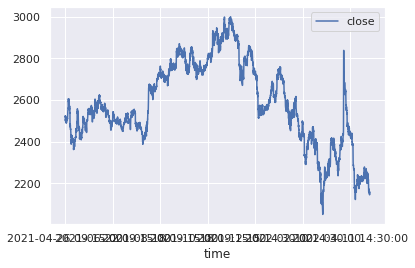

In [ ]:
close_ds.plot(x='time', y='close')

In [ ]:
# ema and vwap

from time import time
from datetime import datetime

"""
  Parameters
    d - previous number of data points to use for EMA
    price - stock price list
  Returns
    list of EMA of all points starting from the dth data point
"""
def calculate_ema(d, price) :
  print(f" Days {d} \n Length of prices {len(price)}")
  # formula https://www.investopedia.com/terms/e/ema.asp
  ema = []                                    # stores the ema starting from the dth data point i.e corresponding to price[d]
  ema_yesterday = sum(price[:d])/d            # sma of first d days, this will serve as the EMA of yesterday
  multiplier = 2/(d+1)                        # multiplier 
  for i in range(d,len(price)):
    ema_today = price[i]*multiplier + ema_yesterday*(1-multiplier)  
    ema.append(ema_today)
    ema_yesterday = ema_today
  print(f" Length of EMA list {len(ema)}")
  return ema



"""
  Parameters
    df - original dataframe
  Returns
    list of vwap
"""

def calculate_vwap(df):
  
  time_format = "%Y-%m-%d %H:%M:%S"
  
  sum_pv = 0
  sum_volume = 0
  
  vwap = []
  
  previous_day = datetime.strptime(df["time"][0], time_format).day

  for i in range(len(df)):
    
    current_day = datetime.strptime(df["time"][i], time_format).day

    if(current_day!=previous_day):
      sum_pv = 0
      sum_volume = 0

    previous_day = current_day

    sum_pv += ((df["high"][i] + df["low"][i] + df["close"][i])/3) * df["volume"][i]
    sum_volume += df["volume"][i]
    vwap.append(sum_pv/sum_volume)
  return vwap

In [ ]:
# price list
price = list(close_ds.drop('time', axis=1).values)
print(f"len prices = {len(price)}")

# ema taking 10 previous points for calculation
ema = calculate_ema(10,price)
print(f"len ema = {len(ema)}")

vwap = calculate_vwap(raw_data)
print(f"len vwap = {len(vwap)}")

len prices = 6404
 Days 10 
 Length of prices 6404
 Length of EMA list 6394
len ema = 6394
len vwap = 6404


In [ ]:
# make all ema, vwap, prices lists of equal length 
price = price[-len(ema):]
vwap = vwap[-len(ema):]

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


<Figure size 1800x1200 with 0 Axes>

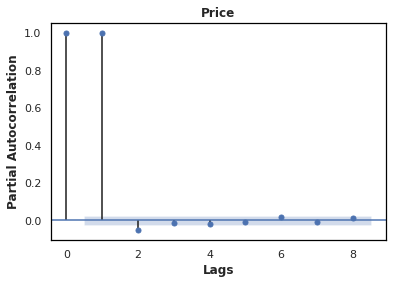

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(6,4), dpi=300)
plot_pacf(price, lags=8)
ax = plt.axes()
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.set_facecolor("white")
#ax.grid(alpha=0.95,color='grey')
plt.ylabel('Partial Autocorrelation', fontweight='bold') 
plt.xlabel('Lags', fontweight='bold') 
plt.title("Price", fontweight='bold')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 1200x800 with 0 Axes>

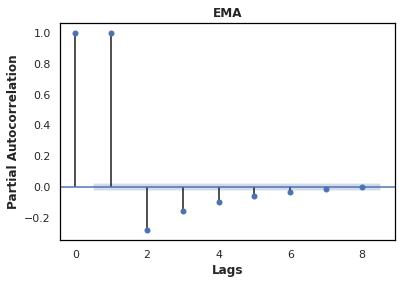

In [ ]:
plt.figure(figsize=(6,4), dpi=200)
plot_pacf(ema, lags=8)
ax = plt.axes()
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.set_facecolor("white")
#ax.grid(alpha=0.95,color='grey')
plt.ylabel('Partial Autocorrelation', fontweight='bold') 
plt.xlabel('Lags', fontweight='bold') 
plt.title("EMA", fontweight='bold')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 1200x800 with 0 Axes>

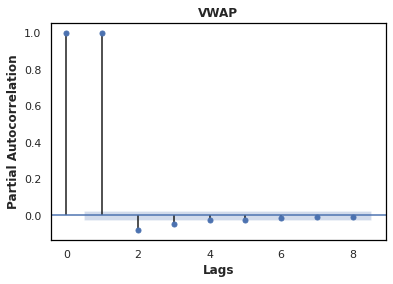

In [ ]:
plt.figure(figsize=(6,4), dpi=200)
plot_pacf(vwap, lags=8)
ax = plt.axes()
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.set_facecolor("white")
#ax.grid(alpha=0.95,color='grey')
plt.ylabel('Partial Autocorrelation', fontweight='bold') 
plt.xlabel('Lags', fontweight='bold') 
plt.title("VWAP", fontweight='bold')
plt.show()

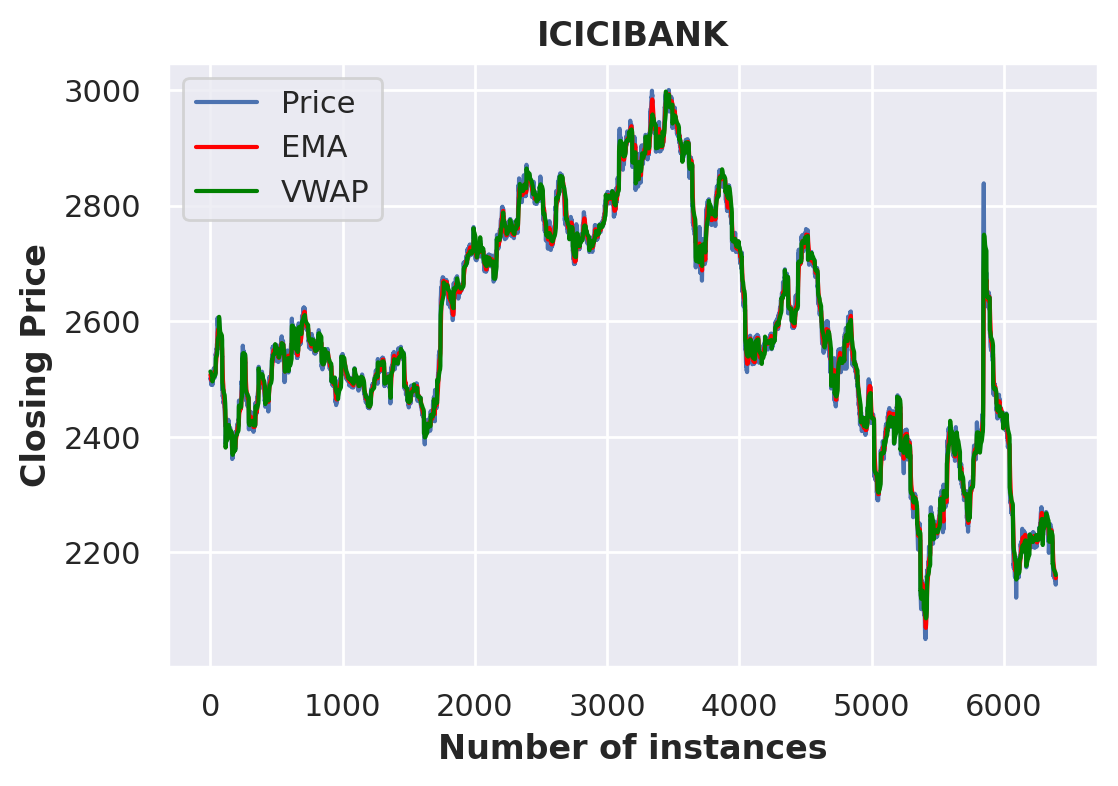

In [ ]:
plt.figure(figsize=(6,4), dpi=200)
plt.ylabel('Closing Price', fontweight='bold') 
plt.xlabel('Number of instances', fontweight='bold') 
plt.title("ICICIBANK", fontweight='bold')
plt.plot(price)
plt.plot(ema, color='red')
plt.plot(vwap,color='green')
plt.legend(['Price','EMA','VWAP'])
plt.show()

In [ ]:

# split a multivariate sequence into samples
# n_steps ---> number of lag observations

def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [ ]:

ema = np.array(ema).reshape(len(ema), 1)
vwap = np.array(vwap).reshape(len(vwap), 1)
price = np.array(price).reshape(len(price), 1)
dataset = np.hstack((ema, vwap, price))
print(dataset)

[[2507.71045455 2513.14143589 2501.3       ]
 [2506.26309917 2512.52045758 2499.75      ]
 [2505.27889932 2511.98249114 2500.85      ]
 ...
 [2157.95085389 2164.20377539 2153.05      ]
 [2155.47797136 2161.99753487 2144.35      ]
 [2156.11834021 2160.88456575 2159.        ]]


In [ ]:
n_steps = 3 
X, y = split_sequences(dataset, n_steps)
print(X.shape, y.shape)
print(X[0], y[0])

(6392, 3, 3) (6392,)
[[2507.71045455 2513.14143589 2501.3       ]
 [2506.26309917 2512.52045758 2499.75      ]
 [2505.27889932 2511.98249114 2500.85      ]] 2500.85


In [ ]:
# train_test_split 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
# type(X_train.values)

(4474, 3, 3)
(4474,)
(1918, 3, 3)
(1918,)


In [ ]:
# Model training

from tensorflow import keras 
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten

# CNN

model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dense(1))
model_cnn.compile(loss='mse', optimizer=keras.optimizers.Adam(lr=0.0003))
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2, 64)             448       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1, 64)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 50)                3250      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 3,749
Trainable params: 3,749
Non-trainable params: 0
______________________________________________________

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
cnn_history = model_cnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=2)

Epoch 1/50
140/140 - 12s - loss: 680397.0625 - val_loss: 183.7552 - 12s/epoch - 83ms/step
Epoch 2/50
140/140 - 0s - loss: 83.6524 - val_loss: 186.2228 - 408ms/epoch - 3ms/step
Epoch 3/50
140/140 - 0s - loss: 82.2407 - val_loss: 183.6123 - 419ms/epoch - 3ms/step
Epoch 4/50
140/140 - 0s - loss: 82.3159 - val_loss: 184.2324 - 408ms/epoch - 3ms/step
Epoch 5/50
140/140 - 0s - loss: 82.1598 - val_loss: 183.2577 - 476ms/epoch - 3ms/step
Epoch 6/50
140/140 - 0s - loss: 82.2601 - val_loss: 186.9206 - 461ms/epoch - 3ms/step
Epoch 7/50
140/140 - 0s - loss: 82.3922 - val_loss: 186.6873 - 416ms/epoch - 3ms/step
Epoch 8/50
140/140 - 0s - loss: 82.1670 - val_loss: 182.2291 - 461ms/epoch - 3ms/step
Epoch 9/50
140/140 - 0s - loss: 82.1843 - val_loss: 183.5689 - 460ms/epoch - 3ms/step
Epoch 10/50
140/140 - 0s - loss: 82.2646 - val_loss: 186.7726 - 414ms/epoch - 3ms/step
Epoch 11/50
140/140 - 0s - loss: 82.1278 - val_loss: 187.2599 - 451ms/epoch - 3ms/step
Epoch 12/50
140/140 - 0s - loss: 82.6160 - val_l

In [ ]:
# saving the model

from keras.models import save_model
model_cnn.save('/content/drive/MyDrive/Major Project 8th sem/Code/keras_models/models/CNN_AAPL_1years_15Min')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Major Project 8th sem/Code/keras_models/models/CNN_AAPL_1years_15Min/assets


In [ ]:
# load the model

from keras.models import load_model
my_model = load_model('/content/drive/MyDrive/Major Project 8th sem/Code/keras_models/models/CNN_AAPL_1years_15Min')
my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2, 64)             448       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1, 64)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 50)                3250      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 3,749
Trainable params: 3,749
Non-trainable params: 0
______________________________________________________

In [ ]:
# # plots 
# fig = plt.figure()
# plt.plot(cnn_history.history['loss'], label='Train loss')
# plt.plot(cnn_history.history['val_loss'], label='Validation loss')
# plt.legend(loc='best')
# plt.xlabel('Epochs')
# plt.ylabel('MSE')

In [ ]:
cnn_train_pred = model_cnn.predict(X_train)
cnn_test_pred = model_cnn.predict(X_test)

In [ ]:
print(y_test[0:10])
print(cnn_test_pred[0:10])

[2746.95 2742.95 2749.5  2736.05 2733.2  2724.5  2729.   2725.95 2724.35
 2721.25]
[[2742.7056]
 [2743.2883]
 [2744.2383]
 [2744.8914]
 [2742.7087]
 [2737.9597]
 [2734.882 ]
 [2733.4192]
 [2732.827 ]
 [2731.2046]]


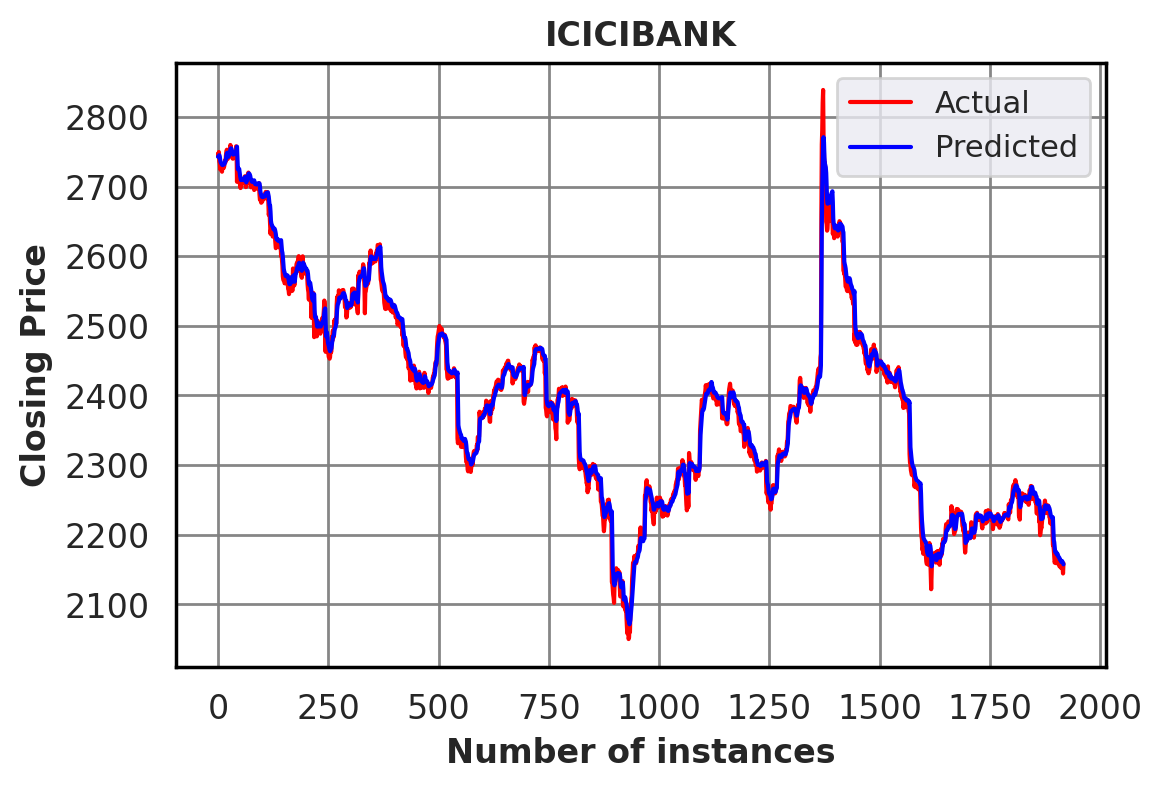

In [ ]:
plt.figure(figsize=(6, 4), dpi=200)
ax = plt.axes()
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.set_facecolor("white")
plt.ylabel('Closing Price', fontweight='bold') 
plt.xlabel('Number of instances', fontweight='bold') 
plt.title("ICICIBANK", fontweight='bold')
ax.grid(alpha=0.95,color='grey')
ax.tick_params(labelsize=12)

plt.plot(pd.Series(y_test), color='red')
plt.plot(pd.Series(cnn_test_pred.flatten()), color='blue')

plt.legend(['Actual','Predicted'])


In [ ]:
from sklearn.metrics import mean_absolute_error
print('Train MAE for vanilla:', mean_absolute_error(y_train, cnn_train_pred))
print('Test MAE for vanilla:', mean_absolute_error(y_test, cnn_test_pred))

Train MAE for vanilla: 6.365082019026598
Test MAE for vanilla: 8.9207696463194


In [ ]:
# RMSE calculation
from sklearn.metrics import mean_squared_error

print('Train rmse:', np.sqrt(mean_squared_error(y_train, cnn_train_pred)))
print('Test rmse:', np.sqrt(mean_squared_error(y_test, cnn_test_pred)))

Train rmse: 9.163575969933369
Test rmse: 13.69173668361895


In [ ]:
# MAPE calculation
from sklearn.metrics import mean_absolute_percentage_error
print('Train MAPE:', mean_absolute_percentage_error(y_train, cnn_train_pred))
print('Test MAPE:', mean_absolute_percentage_error(y_test, cnn_test_pred))

Train MAPE: 0.0023943811010801227
Test MAPE: 0.0037380803367278504
